<a href="https://colab.research.google.com/github/avishek-astra/Deep-Learning-Projects/blob/main/ADDING_MACHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [19]:
#create data
N=2000
#generate data
data=torch.randint(low=-10,high=11,size=(N,2)).float()
#labels
labels=torch.sum(data,dim=1,keepdim=True)
#print the data
for i in range(N):
  print(data[i],labels[i])


tensor([-5.,  8.]) tensor([3.])
tensor([10., -1.]) tensor([9.])
tensor([ -7., -10.]) tensor([-17.])
tensor([ 6., -3.]) tensor([3.])
tensor([-3., -7.]) tensor([-10.])
tensor([9., 8.]) tensor([17.])
tensor([ 6., -1.]) tensor([5.])
tensor([-3.,  2.]) tensor([-1.])
tensor([-4.,  2.]) tensor([-2.])
tensor([-4., -8.]) tensor([-12.])
tensor([ 5., -6.]) tensor([-1.])
tensor([5., 2.]) tensor([7.])
tensor([-8.,  9.]) tensor([1.])
tensor([ 1., -3.]) tensor([-2.])
tensor([-3.,  6.]) tensor([3.])
tensor([ 6., 10.]) tensor([16.])
tensor([ 8., -7.]) tensor([1.])
tensor([-2.,  2.]) tensor([0.])
tensor([ 0., -3.]) tensor([-3.])
tensor([-10.,   0.]) tensor([-10.])
tensor([-10.,  -7.]) tensor([-17.])
tensor([-2., -6.]) tensor([-8.])
tensor([-1.,  8.]) tensor([7.])
tensor([3., 4.]) tensor([7.])
tensor([ 6., -6.]) tensor([0.])
tensor([-2., -3.]) tensor([-5.])
tensor([9., 6.]) tensor([15.])
tensor([10.,  8.]) tensor([18.])
tensor([ 1., -4.]) tensor([-3.])
tensor([ 5., -3.]) tensor([2.])
tensor([-3., 10.]) t

In [20]:
labels.shape

torch.Size([2000, 1])

Model

In [21]:
def createADDmodel():
  #model architecture
  ADDclassify=nn.Sequential(
      nn.Linear(2,30),      #input layer
      nn.ReLU(),            #activation unit
      nn.Linear(30,1),      #hidden layer
      nn.ReLU(),             #activation unit
      nn.Linear(1,1)         #output unit
  )
  #loss function
  lossfun=nn.MSELoss()
  #optimizer
  optimizer=torch.optim.Adam(ADDclassify.parameters(),lr=0.01)
  #model output
  return ADDclassify,lossfun,optimizer

Train the model

In [22]:
# a function that trains the model
#a fixed parameter
numepochs=10
def trainThemodel(ADDmodel):
  #initialize losses
  losses=torch.zeros(numepochs)
  #loop over epochs
  for epochi in range(numepochs):
    numloss=[]
    for num,ans in zip(data,labels):
      #forward pass
      yHat=ADDmodel(num)
      #compute loss
      loss=lossfun(yHat,ans)
      numloss.append(loss.item())
      #backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      #store loss
  losses[epochi]=np.mean(numloss)
  #final forward pass
  with torch.no_grad():
    predictions=ADDmodel(data)
  #compute the predictions and report accuracy
  trainacc=100*torch.mean((np.abs(predictions-labels)<1).float()) #<1 for rounding
  ##now test with new data!!
  #create brand new test data
  TESTdata=torch.randint(low=-10,high=11,size=(N,2)).float()
  TESTlabels=torch.sum(TESTdata,axis=1,keepdim=True)
  #evaluate the model and accuracy
  with torch.no_grad():
    predictions=ADDmodel(TESTdata)
  testacc=100*torch.mean((np.abs(predictions-TESTlabels)<1).float())
  #EOF
  return losses,trainacc,testacc,ADDmodel

In [23]:
#test the model once to make sure it runs
AddingMachine,lossfun,optimizer=createADDmodel()
losses,trainacc,testacc,ADDmodel=trainThemodel(AddingMachine)
#print the results
trainacc,testacc

<ipython-input-22-99ed47257725>:26: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  trainacc=100*torch.mean((np.abs(predictions-labels)<1).float()) #<1 for rounding
<ipython-input-22-99ed47257725>:34: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testacc=100*torch.mean((np.abs(predictions-TESTlabels)<1).float())


(tensor(99.7500), tensor(99.8500))

Run the experiment

In [24]:
for i in range(10):
  #create a new 'machine' and train it
  AddingMachine,lossfun,optimizer=createADDmodel()
  losses,trainacc,testacc,ADDmodel=trainThemodel(AddingMachine)
  #report accuracy
  print('Model instance %s, final TRAIN/TEST accuracies: %g%%,%g%%'%(i+1,trainacc,testacc))

<ipython-input-22-99ed47257725>:26: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  trainacc=100*torch.mean((np.abs(predictions-labels)<1).float()) #<1 for rounding
<ipython-input-22-99ed47257725>:34: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testacc=100*torch.mean((np.abs(predictions-TESTlabels)<1).float())


Model instance 1, final TRAIN/TEST accuracies: 99.75%,99.75%
Model instance 2, final TRAIN/TEST accuracies: 10.4%,9.85%
Model instance 3, final TRAIN/TEST accuracies: 99.7%,99.8%
Model instance 4, final TRAIN/TEST accuracies: 99.15%,99.55%
Model instance 5, final TRAIN/TEST accuracies: 99.75%,99.9%
Model instance 6, final TRAIN/TEST accuracies: 95.1%,96.35%
Model instance 7, final TRAIN/TEST accuracies: 99.75%,99.75%
Model instance 8, final TRAIN/TEST accuracies: 10.4%,9.55%
Model instance 9, final TRAIN/TEST accuracies: 10.4%,9.55%
Model instance 10, final TRAIN/TEST accuracies: 99.75%,99.75%


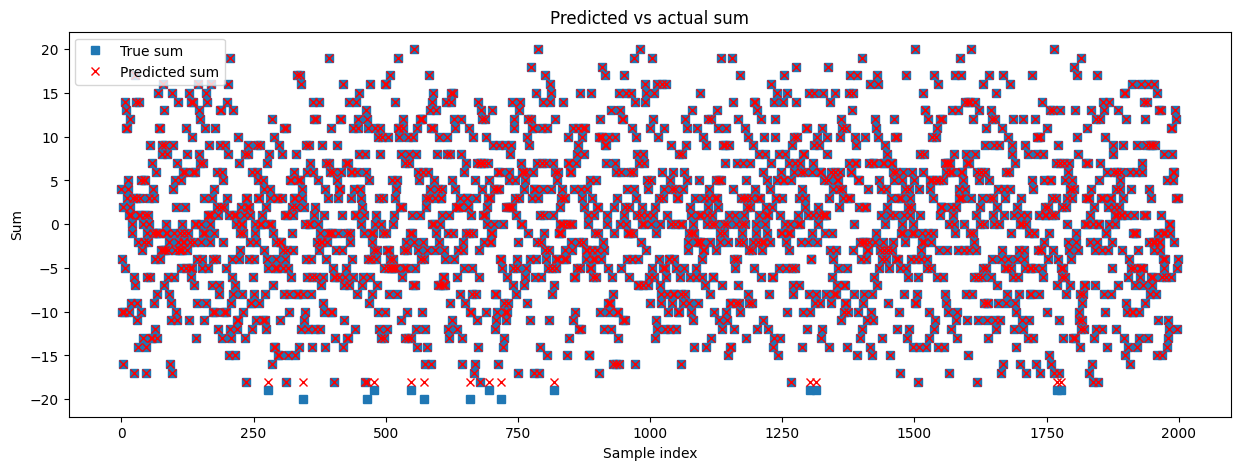

In [25]:
#some plots from the final model
data=torch.randint(low=-10,high=11,size=(N,2)).float()
labels=torch.sum(data,axis=1,keepdim=True)
with torch.no_grad():
  predictions=ADDmodel(data)
#true an predicted values
fig=plt.figure(figsize=(15,5))
plt.plot(labels,'s')
plt.plot(np.round(predictions.detach()),'rx')
plt.legend(['True sum','Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs actual sum')
plt.show()